Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [37]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Vaš kôd ovdje

poly = PolynomialFeatures(degree=1)
phi = poly.fit_transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [8]:
from numpy import linalg

In [9]:
# Vaš kôd ovdje

pseudoInv = np.matmul(inv(np.matmul(phi.transpose(), phi)), phi.transpose())
pseudoInv
w = np.matmul(pseudoInv, y)
print(w)

w = np.matmul(pinv(phi), y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

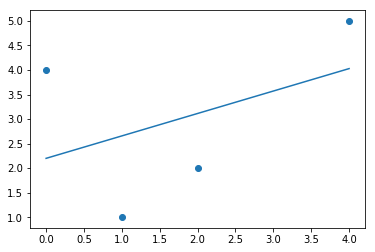

2.042857142857143

In [10]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error

plt.scatter(X,y)
hx = np.matmul(phi, w.transpose())
plt.plot(X, hx)
plt.show()

e = mean_squared_error(y, hx)
e

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [11]:
# Vaš kôd ovdje

# invertedPhi = inv(phi)

poly3 = PolynomialFeatures(degree=3)
phi3 = poly3.fit_transform(X)
phi3

invertedPhi = inv(phi3)
invertedPhi

w = np.matmul(invertedPhi, y)
w

array([ 4.        , -5.91666667,  3.375     , -0.45833333])

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Vaš kôd ovdje

reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
reg = LinearRegression().fit(phi, y)
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(phi)
mean_squared_error(y, y_pred)

[0.45714286]
2.2
[0.         0.45714286]
2.2


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

# (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [19]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    y = []
    for i in range(len(X)):
        y.append(f(X[i]) + normal(scale=noise))
        
    return np.array(y)

def f(x):
    return 5 + x[0] - 2*x[0]**2 - 5*x[0]**3

X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)
y

array([1022.70675805,  646.73279537,  593.98267942,  187.07247839,
        181.79866537,  336.62286932,  573.86437259,   83.61955746,
        219.0744905 ,   92.49154858,  324.86526187,  157.65827176,
         24.91840612,  358.26841044,   53.27279316,  266.1625549 ,
       -174.25539676, -248.22043375,   42.37428739, -304.74061887,
        110.79127693,  -75.41034901,  -55.12992371,  -29.23906842,
       -361.73794754,   80.57750494,  436.82693502, -497.2977559 ,
       -225.29947933,  169.25034495,  -13.32560771,  111.66242772,
        138.55913109,  234.49843393, -217.53431245,   -5.17292447,
        -87.8673315 , -543.32838797, -225.89818257,  -84.63087629,
       -249.99158746, -117.79348931, -393.36759834,  -65.37568985,
       -287.07742177, -498.96081812, -495.82081928, -508.67928304,
       -513.49468174, -811.71681306])

In [16]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

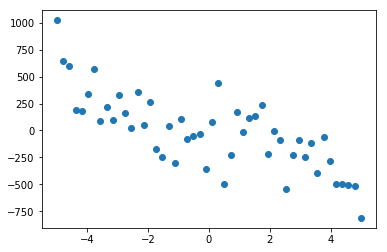

In [20]:
# Vaš kôd ovdje

plt.scatter(X.reshape(1, len(X)), y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=3)
phi = poly.fit_transform(X)

#print(X)
#print(phi)

reg = LinearRegression().fit(phi, y)
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(phi)
mean_squared_error(y, y_pred)

[ 0.          5.33021908  2.5799643  -6.05464165]
-35.25153227425528


37346.559232805426

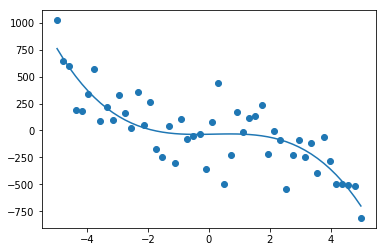

In [23]:
plt.scatter(X.reshape(1, len(X)), y)
plt.plot(X, y_pred)
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Error for model with d = 1 is: 52443.611781183594
Error for model with d = 3 is: 37346.559232805426
Error for model with d = 5 is: 37070.99131782906
Error for model with d = 10 is: 31816.507135587966
Error for model with d = 20 is: 25493.40120713657


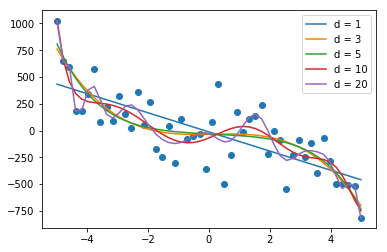

In [24]:
# Vaš kôd ovdje

plt.scatter(X.reshape(1, len(X)), y)

ds = [1,3,5,10,20]

for d in ds:
    poly = PolynomialFeatures(degree=d)
    phi = poly.fit_transform(X)
    
    reg = LinearRegression().fit(phi, y)
    y_pred = reg.predict(phi)
    
    plt.plot(X, y_pred, label="d = " + str(d))
    print("Error for model with d = " + str(d) + " is: " + str(mean_squared_error(y, y_pred)))
    

plt.legend()
plt.show()
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [27]:
from sklearn.model_selection import train_test_split

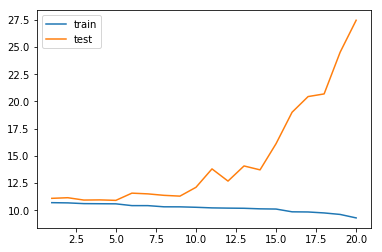

In [32]:
# Vaš kôd ovdje

ds = []
for i in range(20):
    ds.append(i + 1)
    
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

train_errors = []
test_errors = []
for d in ds:
    poly = PolynomialFeatures(degree=d)
    phiTrain = poly.fit_transform(X_train)
    phiTest = poly.fit_transform(X_test)
    
    reg = LinearRegression().fit(phiTrain, y_train)

    y_pred_train = reg.predict(phiTrain)
    y_pred_test = reg.predict(phiTest)
    
    train_errors.append(np.log(mean_squared_error(y_train, y_pred_train)))
    test_errors.append(np.log(mean_squared_error(y_test, y_pred_test)))
    
plt.plot(ds, train_errors, label="train")
plt.plot(ds, test_errors, label="test")
plt.legend()
plt.show()
    

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.\n

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

500
500


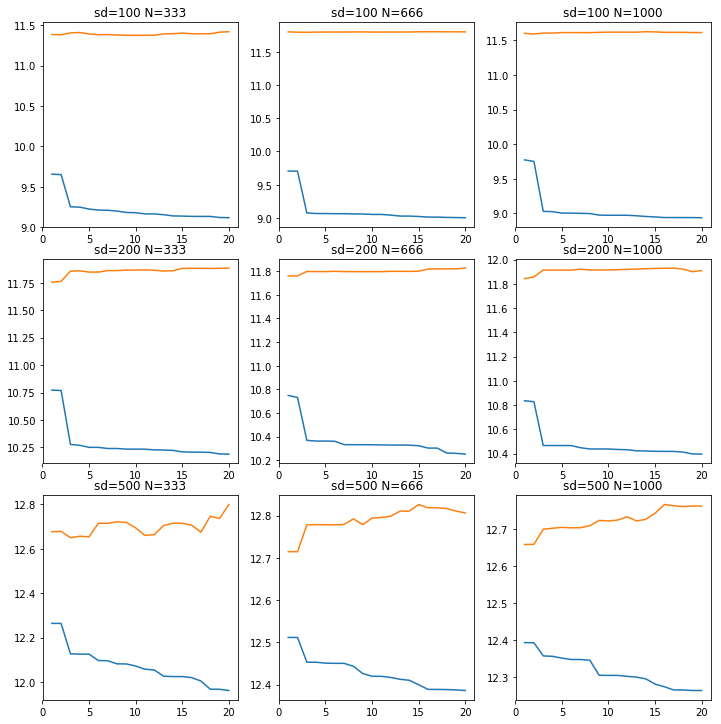

In [34]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 1000)
np.random.shuffle(X)

X_train = X[0:500]
X_test = X[500:1000]
std_deviations = [100, 200, 500]
Ns = [1.0 / 3.0, 2.0 / 3.0, 1.0]

train_Xs = []
test_Xs = []
train_ys = []
test_ys = []

for std_dev in std_deviations:
    y_train = make_labels(X_train, f, noise=std_dev)
    y_test = make_labels(X_test, f, noise=std_dev)

    for ratio in Ns:
        N = int(1000 * ratio)
        train_indices = np.random.choice(500, int(N / 2))
        train_Xs.append(np.array([np.array(X_train[i]) for i in train_indices]))
        train_ys.append(np.array([y_train[i] for i in train_indices]))

        test_indices = np.random.choice(500, int(N / 2))
        test_Xs.append(np.array([np.array(X_test[i]) for i in test_indices]))
        test_ys.append(np.array([y_test[i] for i in train_indices]))

print(len(train_Xs[2]))
print(len(test_Xs[2]))

fig, axes = plt.subplots(3,3)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()

ds = []
for i in range(20):
    ds.append(i + 1)

for i in range(len(std_deviations)):
    for j in range(len(Ns)):
        index = i * len(std_deviations) + j
    
        train_errors = []
        test_errors = []
        for d in ds:
            poly = PolynomialFeatures(degree=d)
            phiTrain = poly.fit_transform(train_Xs[index])
            phiTest = poly.fit_transform(test_Xs[index])

            reg = LinearRegression().fit(phiTrain, train_ys[index])

            y_pred_train = reg.predict(phiTrain)
            y_pred_test = reg.predict(phiTest)

            train_errors.append(np.log(mean_squared_error(train_ys[index], y_pred_train)))
            test_errors.append(np.log(mean_squared_error(test_ys[index], y_pred_test)))

        axes[i][j].plot(ds, train_errors, label="train")
        axes[i][j].plot(ds, test_errors, label="test")
        axes[i][j].set_title("sd=" + str(std_deviations[i]) + " " + "N=" + str(int(Ns[j] * 1000)))



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [38]:
# Vaš kôd ovdje

poly = PolynomialFeatures(degree=3)
phi = poly.fit_transform(X)

lambdas = [0, 1, 10]

for l in lambdas:
    lI = l * np.identity(len(phi[0]))
    lI[0][0] = 0.0
    
    ps_inv = matmul(inv(matmul(phi.transpose(), phi) + lI), phi.transpose())
    w = matmul(ps_inv, y)
    
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [40]:
from sklearn.linear_model import Ridge

In [41]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=3)
phi = poly.fit_transform(X)

for l in lambdas:
    reg = Ridge(alpha=l)
    reg.fit(phi, y)
    print(reg.coef_)
    print(reg.intercept_)

[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000028
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229725


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [42]:
from sklearn.linear_model import Ridge

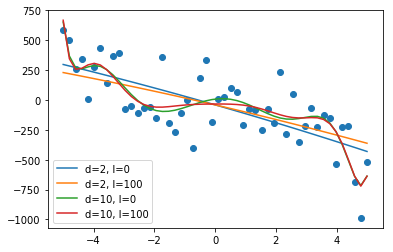

In [43]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)
plt.scatter(X.reshape(1, len(X)), y)

lambdas = [0, 100]
ds = [2, 10]

for d in ds:
    poly = PolynomialFeatures(degree=d)
    phi = poly.fit_transform(X)
    
    for l in lambdas:
        reg = Ridge(alpha=l)
        reg.fit(phi, y)
        y_pred = reg.predict(phi)
        label = "d=" + str(d) + ", l=" + str(l)
        plt.plot(X, y_pred, label=label)

plt.legend()


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


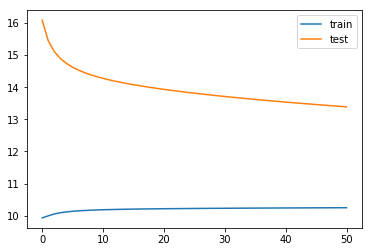

In [47]:
# Vaš kôd ovdje

d = 10
lambdas = [i for i in range(51)]

X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
poly = PolynomialFeatures(degree=d)

phi_train = poly.fit_transform(X_train)
phi_test = poly.fit_transform(X_test)

train_errors = []
test_errors = []

for l in lambdas:
#    mean_squared_error
    reg = Ridge(alpha=l)
    reg.fit(phi_train, y_train)
    y_pred_train = reg.predict(phi_train)
    y_pred_test = reg.predict(phi_test)
    
    train_errors.append(np.log(mean_squared_error(y_pred_train, y_train)))
    test_errors.append(np.log(mean_squared_error(y_pred_test, y_test)))
    
plt.plot(lambdas, train_errors, label="train")
plt.plot(lambdas, test_errors, label="test")
plt.legend()

    

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [48]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

0.0
0.0% of the weights are equal to zero


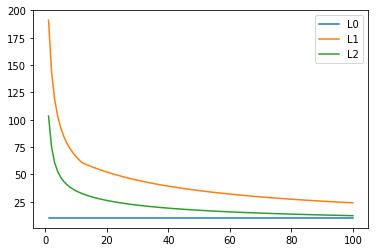

In [71]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

d = 10
lambdas = [i for i in range(1, 101)]

poly = PolynomialFeatures(degree=d)
phi_train = poly.fit_transform(X_train)
phi_test = poly.fit_transform(X_test)

def L1(w):
    suma = 0
    for i in w:
        suma += abs(i)
    return suma

def L2(w):
    return np.sqrt(np.dot(w,w))

l0_values = []
l1_values = []
l2_values = []

for l in lambdas:
    reg = Ridge(alpha=l)
    reg.fit(phi_train, y_train)
    
    l0_values.append(nonzeroes(reg.coef_[1:]))
    l1_values.append(L1(reg.coef_))
    l2_values.append(L2(reg.coef_))
    
    if l==100:
        zero = (len(reg.coef_) - 1) - float(l0_values[-1])
        print(zero)
        percentage = 1 - (float(nonzero) / float(len(reg.coef_) - 1))
        print(str(percentage*100) + "% of the weights are equal to zero")
        

plt.plot(lambdas, l0_values, label="L0")
plt.plot(lambdas, l1_values, label="L1")
plt.plot(lambdas, l2_values, label="L2")
plt.legend()


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

In [72]:
from sklearn.linear_model import Lasso

40.0% of the weights are equal to zero


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207758.71276053073, tolerance: 198.1439762028297
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209898.05346698168, tolerance: 198.1439762028297
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211853.2282228278, tolerance: 198.1439762028297
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213624.7775025

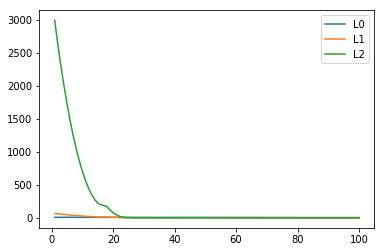

In [77]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

d = 10
lambdas = [i for i in range(1, 101)]

poly = PolynomialFeatures(degree=d)
phi_train = poly.fit_transform(X_train)
phi_test = poly.fit_transform(X_test)

def L1(w):
    suma = 0
    for i in w:
        suma += abs(i)
    return suma

def L2(w):
    return np.dot(w,w)

l0_values = []
l1_values = []
l2_values = []

for l in lambdas:
    reg = Lasso(alpha=l)
    reg.fit(phi_train, y_train)
    
    l0_values.append(nonzeroes(reg.coef_[1:]))
    l1_values.append(L1(reg.coef_))
    l2_values.append(L2(reg.coef_))
    
    if l==100:
        nonzero = l0_values[-1]
        percentage = 1 - nonzero / (len(reg.coef_) - 1)
        print(str(percentage*100) + "% of the weights are equal to zero")
        

plt.plot(lambdas, l0_values, label="L0")
plt.plot(lambdas, l1_values, label="L1")
plt.plot(lambdas, l2_values, label="L2")
plt.legend()



### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [78]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

[[1.95800000e+03 1.86706705e+00]
 [1.19800000e+03 2.27906831e+00]
 [2.08100000e+03 2.24977689e+00]
 [1.19900000e+03 4.46642579e+00]
 [7.01000000e+02 4.56782193e+00]
 [1.69900000e+03 5.00000000e+00]
 [2.10300000e+03 3.05281284e+00]
 [2.02800000e+03 5.00000000e+00]
 [1.92600000e+03 4.60906690e+00]
 [1.84500000e+03 2.76893792e+00]
 [1.38800000e+03 1.00000000e+00]
 [1.23900000e+03 3.80966741e+00]
 [1.08000000e+03 1.62323499e+00]
 [2.09000000e+03 4.79451864e+00]
 [8.36000000e+02 1.83384809e+00]
 [1.43800000e+03 1.90590178e+00]
 [1.25100000e+03 5.00000000e+00]
 [5.26000000e+02 1.00000000e+00]
 [5.76000000e+02 1.53396022e+00]
 [1.63200000e+03 1.00000000e+00]
 [1.96700000e+03 4.29069642e+00]
 [9.15000000e+02 2.90390575e+00]
 [1.87000000e+03 5.00000000e+00]
 [9.44000000e+02 4.47084694e+00]
 [5.09000000e+02 1.53807759e+00]
 [9.03000000e+02 1.00000000e+00]
 [1.58400000e+03 3.24208227e+00]
 [4.51000000e+02 4.61615445e+00]
 [1.51000000e+03 3.17707529e+00]
 [1.65100000e+03 3.93337889e+00]
 [1.020000

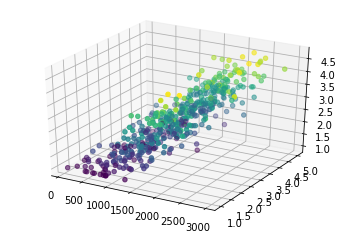

In [79]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(exam_score, grade_in_highschool, grades_y, c=grades_y);

print(grades_X)

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

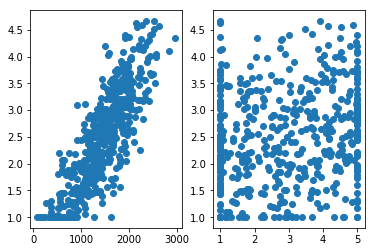

In [80]:
# Vaš kôd ovdje

f, axes = plt.subplots(1,2)
axes[0].scatter(exam_score, grades_y)
axes[1].scatter(grade_in_highschool, grades_y)

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]


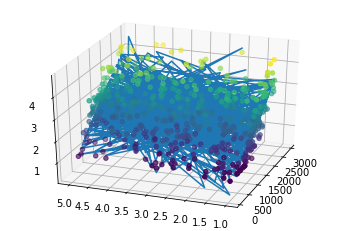

In [81]:
# Vaš kôd ovdje
l = 0.01

reg = Ridge(alpha=l)
reg.fit(grades_X, grades_y)
print(reg.coef_)
y_pred = reg.predict(grades_X)

ax = plt.axes(projection='3d')
ax.scatter3D(exam_score, grade_in_highschool, grades_y, c=grades_y);
ax.plot3D(exam_score, grade_in_highschool, y_pred);

ax.view_init(30, 200)
plt.draw()


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [82]:
from sklearn.preprocessing import StandardScaler

In [103]:
# Vaš kôd ovdje
scaler = StandardScaler()
scaler.fit(grades_X)
grades_X_fixed = scaler.transform(grades_X)

scaler.fit(grades_y.reshape(-1,1))
grades_y_fixed = scaler.transform(grades_y.reshape(-1,1))
grades_y_fixed = grades_y_fixed.reshape(1,-1)[0]

reg = Ridge(alpha=l)
reg.fit(grades_X_fixed, grades_y_fixed)
y_pred = reg.predict(grades_X_fixed)
print(reg.coef_)

#ax = plt.axes(projection='3d')
#ax.scatter3D(exam_score, grade_in_highschool, grades_y_fixed, c=grades_y);
#ax.plot3D(exam_score, grade_in_highschool, y_pred);

#ax.view_init(30, -10)
#plt.draw()



[0.81630375 0.15167761]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [104]:
# Vaš kôd ovdje
#print(grades_X_fixed)
#print(grades_X_fixed[0:][1])
last_column = [grades_X_fixed[i][1] for i in range(len(grades_X_fixed))]
last_column
grades_X_fixed.T

grades_X_fixed_colinear = []
for row in grades_X_fixed.T:
    grades_X_fixed_colinear.append(row)

grades_X_fixed_colinear.append(last_column)

grades_X_fixed_colinear = np.array(grades_X_fixed_colinear).T
grades_X_fixed_colinear

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [105]:
# Vaš kôd ovdje

l = 0.01

reg = Ridge(alpha=l)
reg.fit(grades_X_fixed_colinear, grades_y_fixed)

reg.coef_

array([0.81630364, 0.07583957, 0.07583957])

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [107]:
# Vaš kôd ovdje

l1 = 0.01
l2 = 1000

W1 = []
W2 = []

for i in range(10):
    train_indices = np.random.choice(len(grades_X_fixed_colinear), int(len(grades_X_fixed_colinear) / 2))
    X = []
    y = []
    for index in train_indices:
        X.append(grades_X_fixed_colinear[index])
        y.append(grades_y_fixed[index])
    
    X = np.array(X)
    
    reg = Ridge(alpha=l1)
    reg.fit(X, y)
    W1.append(reg.coef_)
    
    reg = Ridge(alpha=l2)
    reg.fit(X, y)
    W2.append(reg.coef_)

W1 = np.array(W1)
W2 = np.array(W2)

print(W1)
print()
print(W2)

scaler = StandardScaler()
scaler.fit(W1)
var1 = np.sqrt(scaler.var_)

scaler = StandardScaler()
scaler.fit(W2)
var2 = np.sqrt(scaler.var_)

print("Std deviations")
print(var1)
print(var2)
    

[[0.8166461  0.04786783 0.04786783]
 [0.84243676 0.03456735 0.03456735]
 [0.82462855 0.07854138 0.07854138]
 [0.80147784 0.08675236 0.08675236]
 [0.7784359  0.08302209 0.08302209]
 [0.79258621 0.04494513 0.04494513]
 [0.79387801 0.08464899 0.08464899]
 [0.79774862 0.07973957 0.07973957]
 [0.83490906 0.04738803 0.04738803]
 [0.776666   0.08083519 0.08083519]]

[[0.18454328 0.03736452 0.03736452]
 [0.16856262 0.02024148 0.02024148]
 [0.16986241 0.03884921 0.03884921]
 [0.16023028 0.03665605 0.03665605]
 [0.16191573 0.03891344 0.03891344]
 [0.15988938 0.01678582 0.01678582]
 [0.15950805 0.03136108 0.03136108]
 [0.16295753 0.03915272 0.03915272]
 [0.18160691 0.02527122 0.02527122]
 [0.14851059 0.04232496 0.04232496]]
Std deviations
[0.02158557 0.0193234  0.0193234 ]
[0.01026121 0.00844725 0.00844725]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [121]:
from numpy.linalg import cond
# Vaš kôd ovdje
phi = grades_X_fixed_colinear
print("Without regularization")

product = np.matmul(phi.T, phi)
print(cond(product))

print("\nLambda = 0.01")
I = np.identity(len(phi[0]))
I[0][0] = 0
lI = I * 0.01
print(cond(product + lI))

print("\nLambda = 10")
I = np.identity(len(phi[0]))
I[0][0] = 0
lI = I * 10
print(cond(product + lI))


Without regularization
inf

Lambda = 0.01
100542.85592820004

Lambda = 10
101.53146069838155


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  